In [ ]:
import pandas as pd

import json

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [ ]:
df = pd.read_csv('timepoints_most_recent.csv', sep=';', parse_dates=['date', 'registrationDate'])

In [ ]:
df.head()

,id,userId,date,time,data,filled,registrationDate
0,1,182416313.0,2019-11-12,'12:00:00',"'{\""date\"": \""2019-11-12\"", \""time\"": \""12:00\""}'",0.0,2019-11-12 12:00:01
1,2,182416313.0,2019-11-12,'16:00:00',"'{\""date\"": \""2019-11-12\"", \""time\"": \""16:00\""}'",0.0,2019-11-12 16:00:01
2,3,182416313.0,2019-11-12,'20:00:00',"'{\""date\"": \""2019-11-12\"", \""time\"": \""20:00\""}'",0.0,2019-11-13 04:00:01
3,4,182416313.0,2019-11-13,'08:00:00',"'{\""date\"": \""2019-11-13\"", \""time\"": \""08:00\""}'",0.0,2019-11-13 08:00:02
4,5,150441384.0,2019-11-13,'16:00:00',"'{\""date\"": \""2019-11-13\"", \""time\"": \""16:00\...",1.0,2019-11-13 13:20:10


In [ ]:
df.shape

(129124, 7)

In [ ]:
df['time'] = df['time'].apply(lambda x: x.replace("'", "") if type(x)==str else None)

In [ ]:
df['time'].unique()

array(['12:00:00', '16:00:00', '20:00:00', '08:00:00', '21:00:00',
       '09:00:00', '15:00:00', '11:00:00', '13:00:00', '14:00:00',
       '17:00:00', '19:00:00', '22:00:00', '23:00:00', '10:00:00',
       '18:00:00', None], dtype=object)

In [ ]:
df['time'].value_counts()

21:00:00    42657
15:00:00    42634
10:00:00    42577
20:00:00      277
12:00:00      275
16:00:00      275
08:00:00      262
22:00:00       28
11:00:00       24
23:00:00       22
13:00:00       18
19:00:00       15
17:00:00       14
14:00:00       13
18:00:00       12
09:00:00        3
Name: time, dtype: int64

In [ ]:
time_used = ["10:00:00", "15:00:00", "21:00:00"]

In [ ]:
df.drop(df[~df.time.isin(time_used)].index, inplace=True)

In [ ]:
df.drop(df[df.userId.isna()].index, inplace=True)

In [ ]:
df['id'] = df['id'].astype('int')
df['userId'] = df['userId'].astype('int')
df['filled'] = df['filled'].astype('int')

In [ ]:
df.drop(df[df.filled==0].index, inplace=True)

In [ ]:
df.head()

,id,userId,date,time,data,filled,registrationDate
959,1079,199655835,2020-03-25,21:00:00,"'{\""date\"": \""2020-03-25\"", \""time\"": \""21:00\...",1,2020-03-25 18:02:16
1074,1199,199655835,2020-04-16,21:00:00,"'{\""date\"": \""2020-04-16\"", \""time\"": \""21:00\...",1,2020-04-16 18:06:10
1090,1234,149449069,2020-04-17,21:00:00,"'{\""date\"": \""2020-04-17\"", \""time\"": \""21:00\...",1,2020-04-17 18:18:57
1091,1235,199655835,2020-04-17,21:00:00,"'{\""date\"": \""2020-04-17\"", \""time\"": \""21:00\...",1,2020-04-17 18:19:18
1110,1254,199655835,2020-04-19,15:00:00,"'{\""date\"": \""2020-04-19\"", \""time\"": \""15:00\...",1,2020-04-19 12:15:23


In [ ]:
df.shape

(40829, 7)

In [ ]:
df.sort_values(['userId', 'date', 'time'], inplace=True)
df.reset_index(inplace=True, drop=True)

In [ ]:
d = df.groupby('userId').agg({'date': ['min', 'max']})

In [ ]:
d['date']['min'].describe()

<ipython-input-17-50898ae2e435>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  d['date']['min'].describe()


count                     537
unique                     94
top       2023-02-10 00:00:00
freq                       68
first     2020-03-25 00:00:00
last      2023-06-13 00:00:00
Name: min, dtype: object

In [ ]:
d['date']['max'].describe()

<ipython-input-18-f855271c48bf>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  d['date']['max'].describe()


count                     537
unique                    204
top       2023-07-07 00:00:00
freq                       18
first     2020-04-17 00:00:00
last      2023-07-07 00:00:00
Name: max, dtype: object

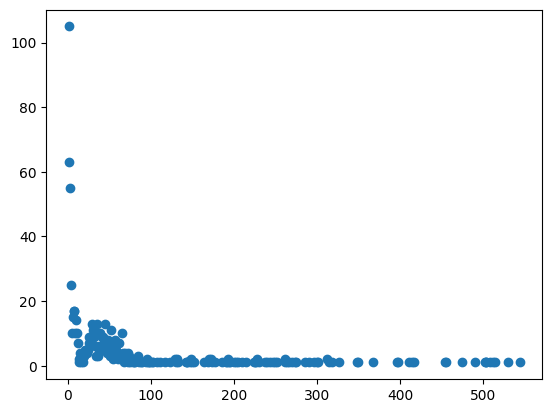

In [ ]:
d = df.groupby('date').userId.count().value_counts()
plt.scatter(d.index, d.values)

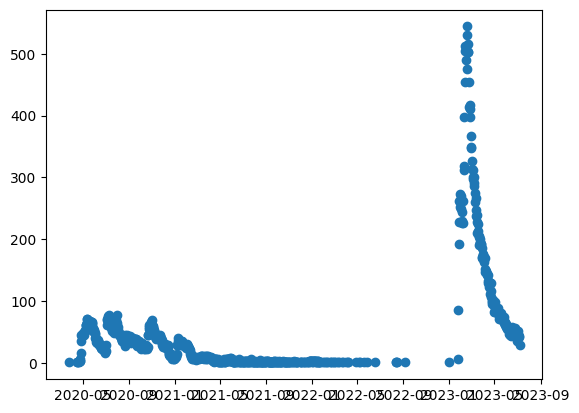

In [ ]:
d = df.groupby('date').userId.count()
plt.scatter(d.index, d.values)

In [ ]:
dt_start = '2020-05-01'
dt_end = '2021-07-07'

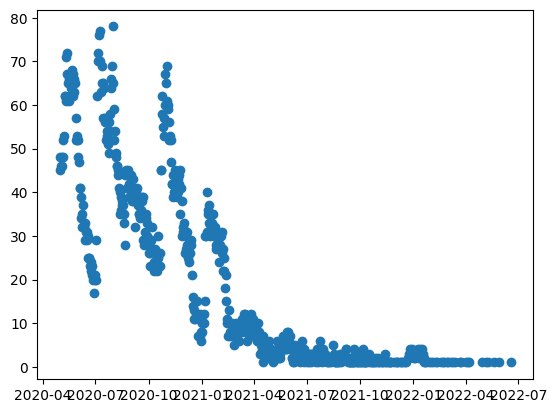

In [ ]:
d = df[(df.date>=dt_start)
   &(df.date<=dt_end)
  ].groupby('date').userId.count()
plt.scatter(d.index, d.values)

In [ ]:
df.drop(df[(df.date<dt_start)|(df.date>dt_end)].index, inplace=True)
df.reset_index(inplace=True, drop=True)

In [ ]:
df.userId.count()

12323

In [ ]:
Ndays_filled = 30
perc_filled = 0.8

In [ ]:
df_agg = df.groupby(['userId', 'date'], as_index=False).filled.count()

In [ ]:
fitting_users = []
for userId, subdf in df_agg.groupby('userId'):
    d = subdf.set_index('date')

    d = d.rolling(f'{Ndays_filled}D').filled.count() / Ndays_filled

    if d[d > perc_filled].shape[0] > 0:
        fitting_users.append((userId, d[d > perc_filled].index))

In [ ]:
len(fitting_users)

74

In [ ]:
users_s = sorted([el[0] for el in fitting_users])

In [ ]:
selected = [44614239,
35514898,
94273782,
259472844,
284555357,
303220403,
413610745,
478597130,
773340705,
969620182,
1058477944,
1076665216,
260120699,
131826899,
1127819258,
391075937,
267308463,
215466404,
42764767,
202814558,
156177903,
81653795,
98569689,
147041049,
167990105,
211512347,
317572634,
350234573,
358722270,
449332908,
454712830,
576890187,
782514447,
1026553457,
1111398682,
354202773,
268374225,
239315927,
202940937,
523041949,
1109337656,
1013344373,
858942023,
819982046,
653201724,
282455460,
313654972,
238407825,
299923822,
378631887,
405617914,
486276436,
510903024,
542001437,
545905349,
779395113,
1233119826,
545675494,
539894990,
526856269,
360711532,
128900361,
653201724,
57795829]


In [ ]:
ns = 0
for u in selected:
    if u in users_s:
        ns += 1

In [ ]:
ns

64

In [ ]:
len(selected)

64

In [ ]:
df.drop(df[~df.userId.isin(users_s)].index, inplace=True)

In [ ]:
df.shape

(11822, 7)

In [ ]:
df.userId.nunique()

74

In [ ]:
full_json = []
for idx, row in tqdm(df.iterrows()):
    s = row.data
    for i, el in enumerate(s):
        if el == '{':
            break
    for j, el in enumerate(s[::-1]):
        if el == '}':
            break

    s1 = s[i:len(s)-j]
    s2 = json.loads(s1.replace('\\"', '"').replace("\\'", "'").replace('\\\\', '\\'))
    s2.update({'id': row.id})
    full_json.append(s2)

11822it [00:00, 12311.20it/s]


In [ ]:
len(full_json)

11822

In [ ]:
with open('json_data_by_id.json', 'w') as fp:
    json.dump(full_json, fp)

In [ ]:
df[['id', 'userId', 'date', 'time', 'filled', 'registrationDate']]\
    .to_csv('df_full.csv', sep=';', index=False)

In [ ]:
df_data = pd.DataFrame.from_dict(full_json)
df_data.to_csv('df_data_tp=-3.csv', sep=';', index=False)

In [ ]:
df

,id,userId,date,time,data,filled,registrationDate
0,13018,23395205,2020-10-22,21:00:00,"'{\""date\"": \""2020-10-22\"", \""time\"": \""21:00\...",1,2020-10-22 18:39:41
1,13032,23395205,2020-10-23,10:00:00,"'{\""date\"": \""2020-10-23\"", \""time\"": \""10:00\...",1,2020-10-23 07:05:34
2,13052,23395205,2020-10-23,15:00:00,"'{\""date\"": \""2020-10-23\"", \""time\"": \""15:00\...",1,2020-10-23 12:02:37
3,13074,23395205,2020-10-23,21:00:00,"'{\""date\"": \""2020-10-23\"", \""time\"": \""21:00\...",1,2020-10-23 18:01:49
4,13110,23395205,2020-10-24,10:00:00,"'{\""date\"": \""2020-10-24\"", \""time\"": \""10:00\...",1,2020-10-24 07:23:57
...,...,...,...,...,...,...,...
12318,24526,1392085020,2021-03-17,15:00:00,"'{\""date\"": \""2021-03-17\"", \""time\"": \""15:00\...",1,2021-03-17 21:34:16
12319,34955,1392085020,2021-08-16,10:00:00,"'{\""date\"": \""2021-08-16\"", \""time\"": \""10:00\...",1,2021-08-16 15:31:58
12320,34933,1392085020,2021-08-16,21:00:00,"'{\""date\"": \""2021-08-16\"", \""time\"": \""21:00\...",1,2021-08-16 11:29:15
12321,35105,1392085020,2021-08-18,15:00:00,"'{\""date\"": \""2021-08-18\"", \""time\"": \""15:00\...",1,2021-08-18 19:05:49
